In [ ]:
import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

In [ ]:
def draw_lines(img, lines):
    try:
        for line in lines:
            coords = line[0]
            cv2.line(img, (coords[0],coords[1]), (coords[2],coords[3]), [255,255,255], 3)
    except:
        pass


def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked


def process_img(original_image):
    # processed_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    processed_img = cv2.Canny(original_image, 100, 150)
    processed_img = cv2.GaussianBlur(processed_img, (3,3), 0 )
    vertices = np.array([[10,500],[10,300], [300,200], [500,200], [800,300], [800,500]], np.int32)
    processed_img = roi(processed_img, [vertices])

    #                       edges
    lines = cv2.HoughLinesP(processed_img, 1, np.pi/180, 180, np.array([]), 20, 15)
    draw_lines(processed_img,lines)
    return processed_img


def hough(image_name):
    screen = cv2.imread(image_name)
    new_screen = process_img(screen)
    cv2_imshow(new_screen)

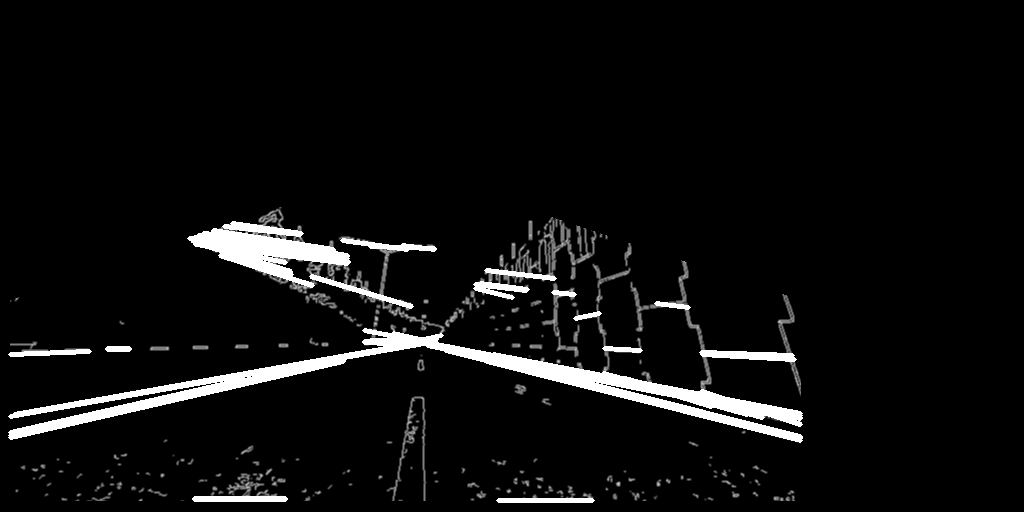

In [ ]:
hough("1left.png")

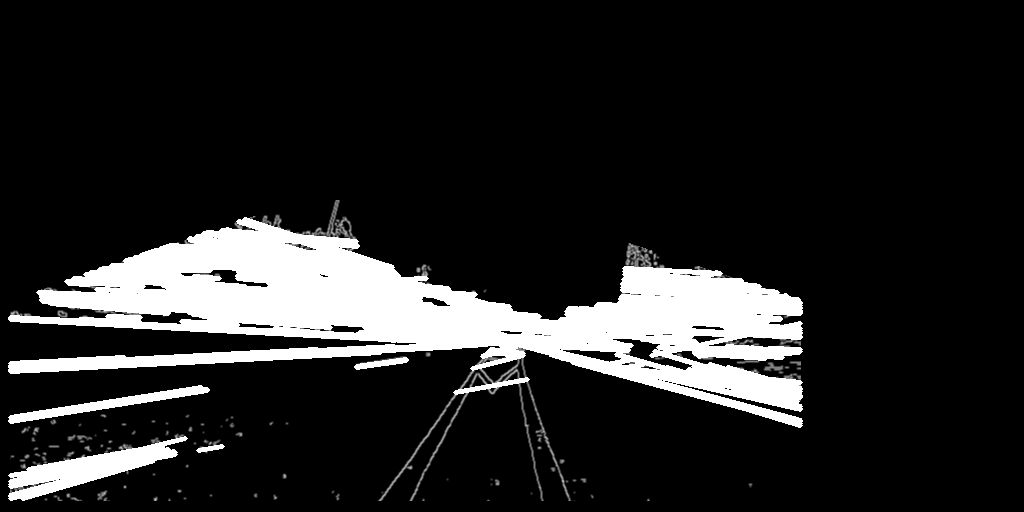

In [ ]:
hough("2left.png")

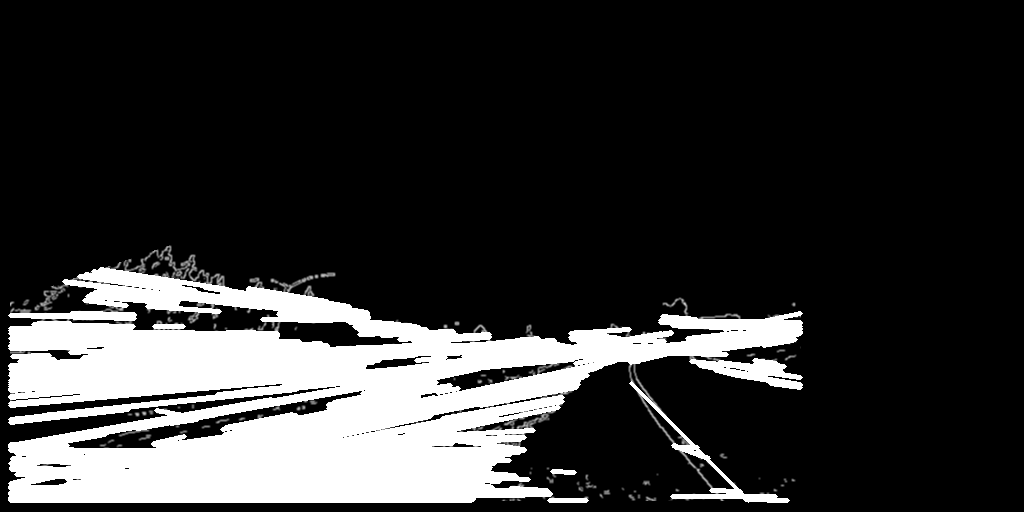

In [ ]:
hough("3left.png")

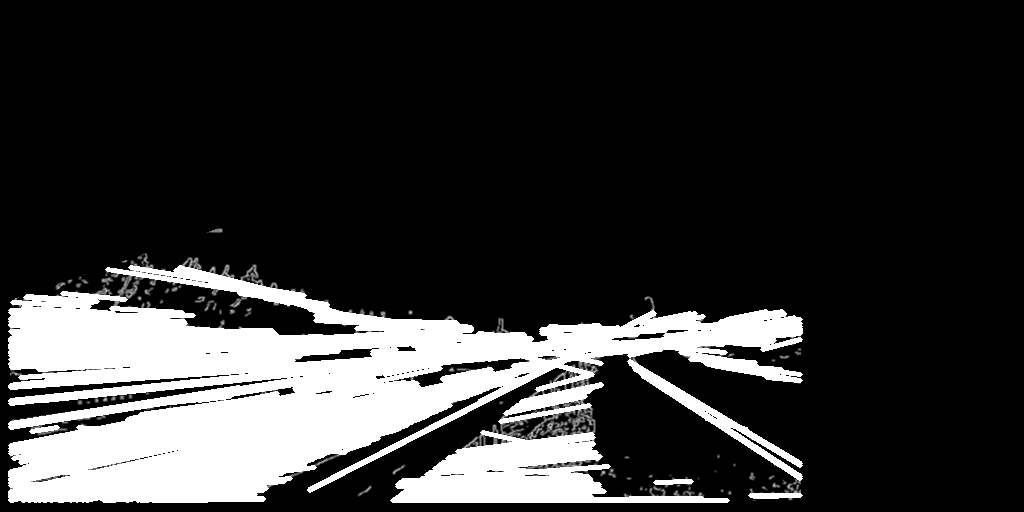

In [ ]:
hough("4left.png")

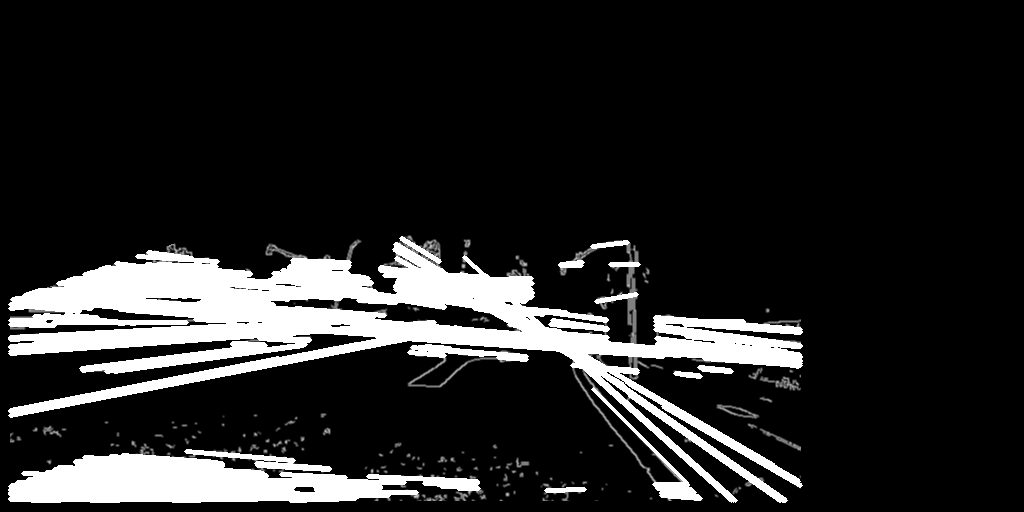

In [ ]:
hough("5left.png")